In [63]:
import numpy as np
import pandas as pd

In [64]:
names = ['label']
names.extend(['feature-{0}'.format(i) for i in range(13)]) 
data = pd.read_csv('wine-data/wine.data', names=names)

In [65]:
data.head()

label  feature-0  feature-1  feature-2  feature-3  feature-4  feature-5  \
0      1      14.23       1.71       2.43       15.6        127       2.80   
1      1      13.20       1.78       2.14       11.2        100       2.65   
2      1      13.16       2.36       2.67       18.6        101       2.80   
3      1      14.37       1.95       2.50       16.8        113       3.85   
4      1      13.24       2.59       2.87       21.0        118       2.80   

   feature-6  feature-7  feature-8  feature-9  feature-10  feature-11  \
0       3.06       0.28       2.29       5.64        1.04        3.92   
1       2.76       0.26       1.28       4.38        1.05        3.40   
2       3.24       0.30       2.81       5.68        1.03        3.17   
3       3.49       0.24       2.18       7.80        0.86        3.45   
4       2.69       0.39       1.82       4.32        1.04        2.93   

   feature-12  
0        1065  
1        1050  
2        1185  
3        1480  
4         735

In [66]:
data.describe()

label   feature-0   feature-1   feature-2   feature-3   feature-4  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

        feature-5   feature-6   feature-7   feature-8   feature-9  feature-10  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     2.295112    2.029270    0.361854    1.590899    5.058090    0.957449   
std      0.625851    0.998859    0.124453    0.572359    2.318286    0.228572   
min      0.980000    0.340000    0.130000    0.410000    1.280000    0.480000   
25%      1.742500    1.205000    0.270000    1.250000    3.220000    0.782500   
50%      2.355000    2.135000    0.340000    1.555000    4.690000    0.965000   
75%      2.800000    2.875000    0.437500    1.950000    6.200000    1.120000   
max      3.880000    5.080000    0.660000    3.580000   13.000000    1.710000   

       feature-11   feature-12  
count  178.000000   178.000000  
mean     2.611685   746.893258  
std      0.709990   314.907474  
min      1.270000   278.000000  
25%      1.937500   500.500000  
50%      2.780000   673.500000  
75%      3.170000   985.000000  
max      4.000000  1680.000000

In [67]:
with open('wine-data/wine.names') as f:
    for line in f.readlines():
        print line


1. Title of Database: Wine recognition data

	Updated Sept 21, 1998 by C.Blake : Added attribute information



2. Sources:

   (a) Forina, M. et al, PARVUS - An Extendible Package for Data

       Exploration, Classification and Correlation. Institute of Pharmaceutical

       and Food Analysis and Technologies, Via Brigata Salerno, 

       16147 Genoa, Italy.



   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au

   (c) July 1991

3. Past Usage:



   (1)

   S. Aeberhard, D. Coomans and O. de Vel,

   Comparison of Classifiers in High Dimensional Settings,

   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of

   Mathematics and Statistics, James Cook University of North Queensland.

   (Also submitted to Technometrics).



   The data was used with many others for comparing various 

   classifiers. The classes are separable, though only RDA 

   has achieved 100% correct classification.

   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed dat

# Visualizing the distribution of a dataset


In [68]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

/home/antman/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


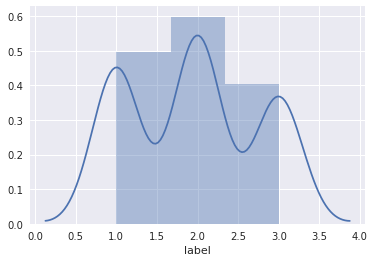

In [69]:
sns.distplot(data.label)

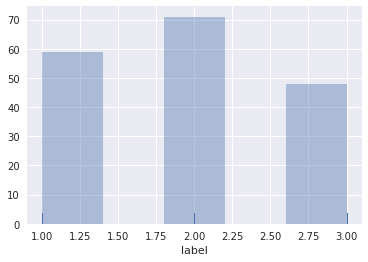

In [70]:
sns.distplot(data.label, kde=False, rug=True, bins=5)

# Visualizing pairwise relationships in a dataset

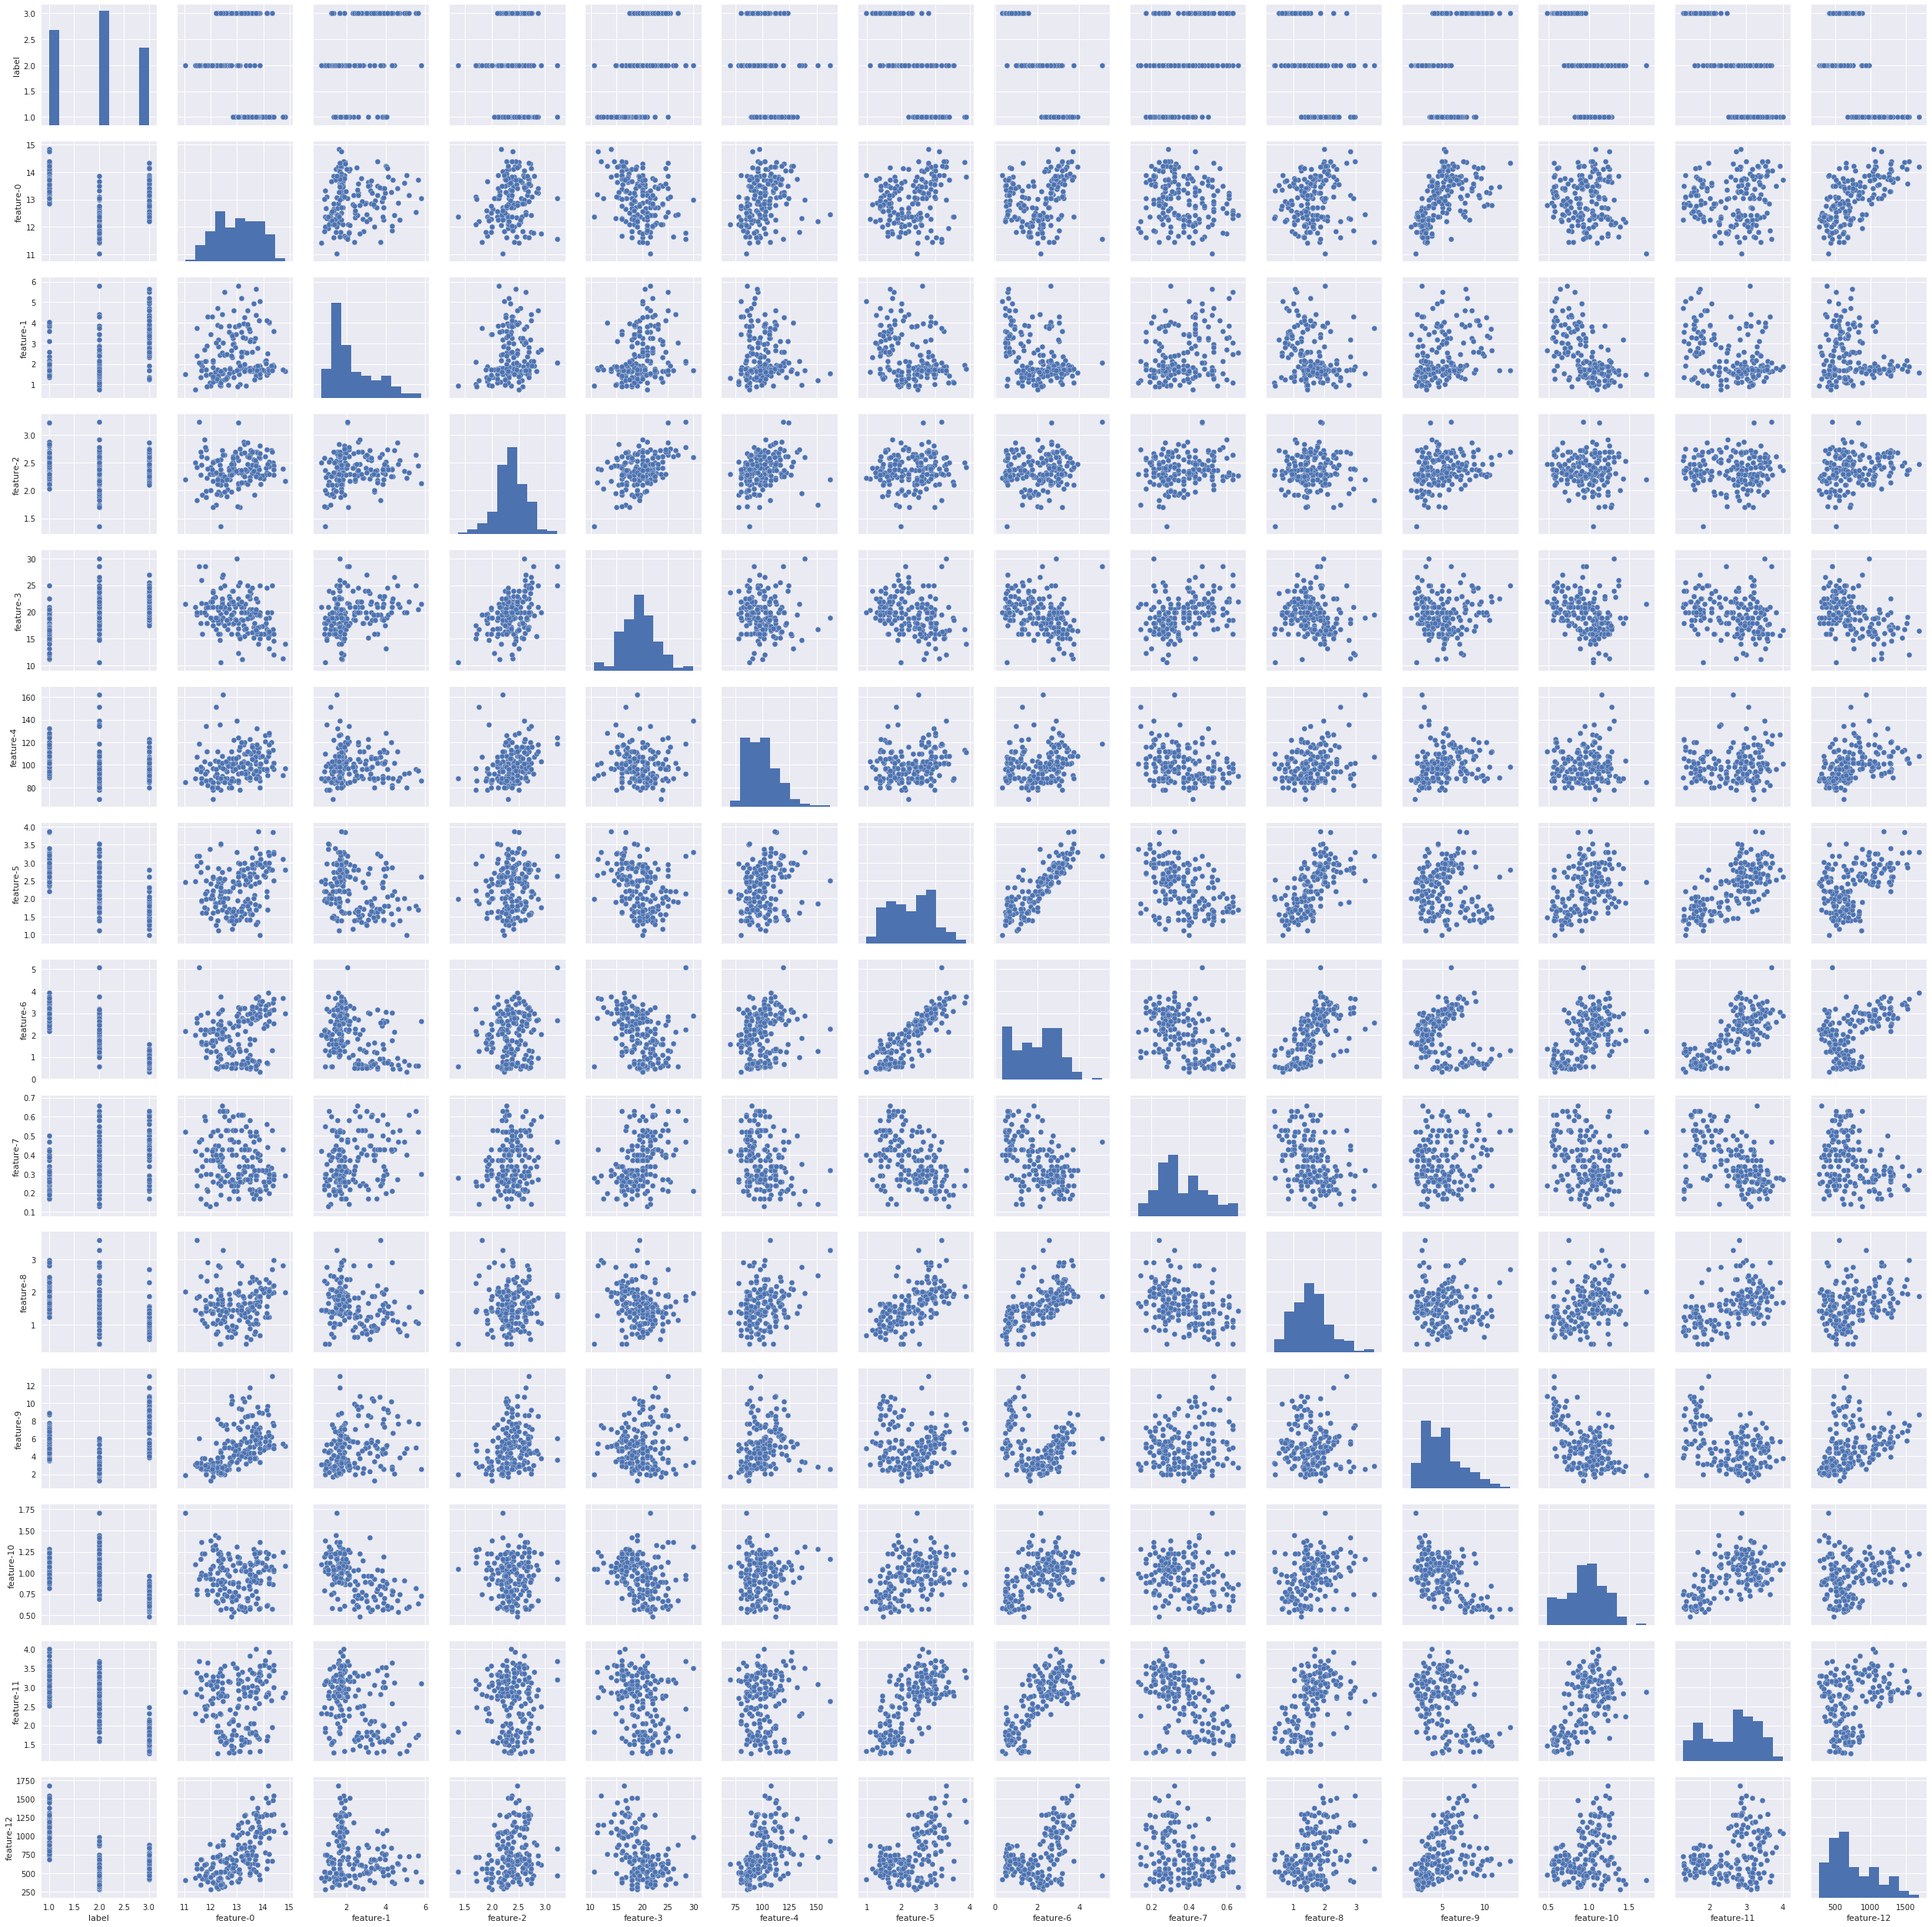

In [71]:
sns.pairplot(data)

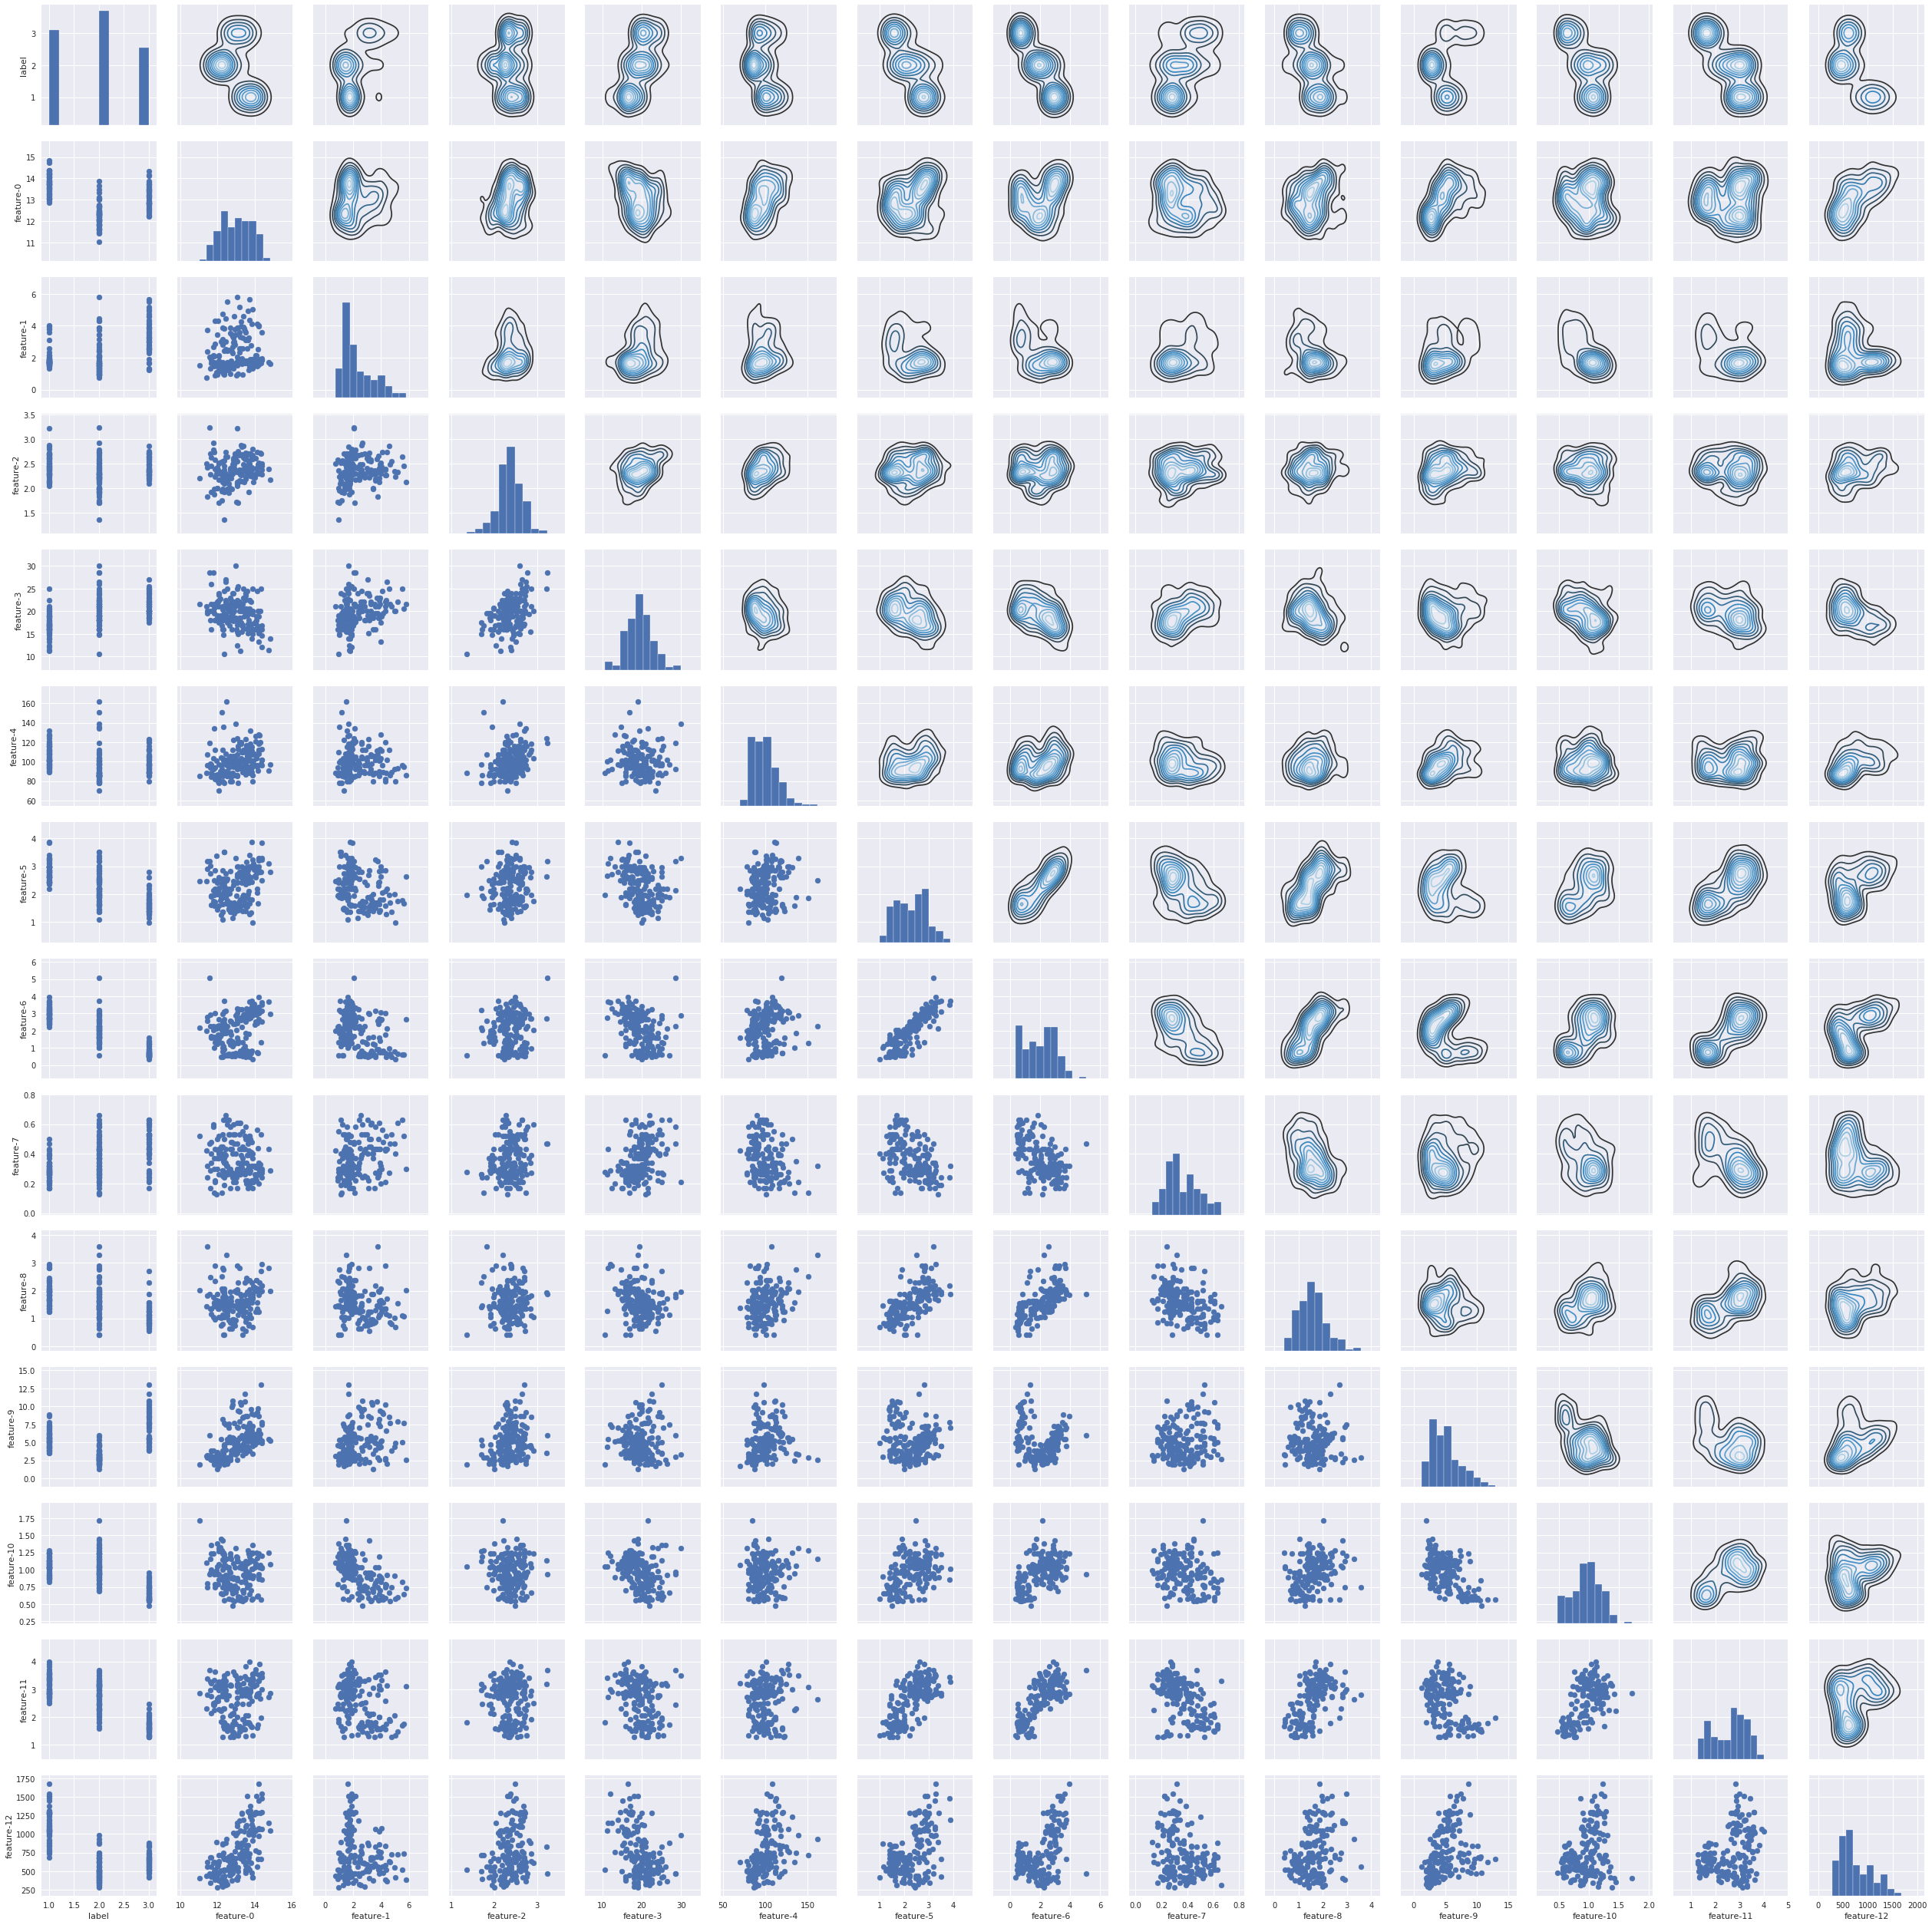

In [73]:
g = sns.PairGrid(data)
g = g.map_lower(plt.scatter)
g = g.map_upper(sns.kdeplot, cmap="Blues_d")
g = g.map_diag(plt.hist, edgecolor="w")

# explore bivariate distributions

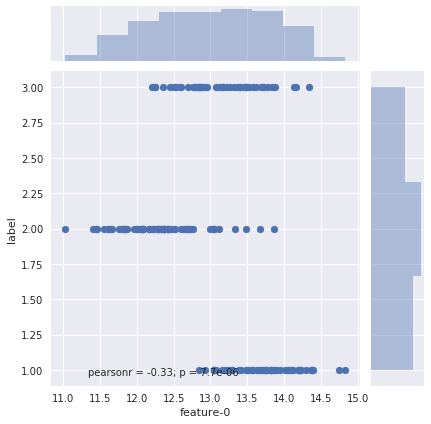

In [74]:
sns.jointplot('feature-0', 'label', data)

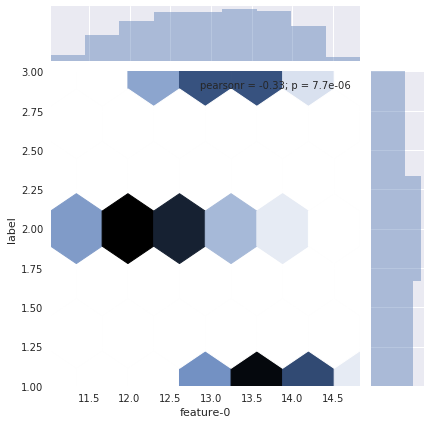

In [75]:
g = sns.jointplot('feature-0', 'label', data, kind='hex')

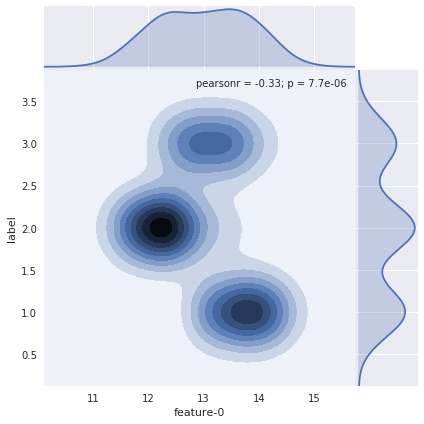

In [76]:
g = sns.jointplot('feature-0', 'label', data, kind='kde', space=0)

# Split Data

In [77]:
X = data.drop('label', axis=1)
y = data.label

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import *

## Raw LR model without feature selection

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [80]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
print 'R-Square Score: {0}'.format(model.score(X_test, y_test))

R-Square Score: 0.844536756176


In [82]:
lassocv = LassoCV(alphas=np.logspace(-4, -0.5, 30))
lassocv.fit(X, y)
print 'R-Square Score: {0}'.format(lassocv.score(X_test, y_test))

R-Square Score: 0.8776802107


In [83]:
help(LassoCV)

Help on class LassoCV in module sklearn.linear_model.coordinate_descent:

class LassoCV(LinearModelCV, sklearn.base.RegressorMixin)
 |  Lasso linear model with iterative fitting along a regularization path
 |  
 |  The best model is selected by cross-validation.
 |  
 |  The optimization objective for Lasso is::
 |  
 |      (1 / (2 * n_samples)) * ||y - Xw||^2_2 + alpha * ||w||_1
 |  
 |  Read more in the :ref:`User Guide <lasso>`.
 |  
 |  Parameters
 |  ----------
 |  eps : float, optional
 |      Length of the path. ``eps=1e-3`` means that
 |      ``alpha_min / alpha_max = 1e-3``.
 |  
 |  n_alphas : int, optional
 |      Number of alphas along the regularization path
 |  
 |  alphas : numpy array, optional
 |      List of alphas where to compute the models.
 |      If ``None`` alphas are set automatically
 |  
 |  precompute : True | False | 'auto' | array-like
 |      Whether to use a precomputed Gram matrix to speed up
 |      calculations. If set to ``'auto'`` let us decide. Th

# Raw LR model add cross validation

In [84]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [85]:
score = cross_val_score(LinearRegression(), X, y, cv=5, n_jobs=-1)

In [86]:
score.mean(), score

(0.18342540559426088,
 array([ 0.        ,  0.51460008,  0.        ,  0.40252695,  0.        ]))

In [87]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like, with shape (n_samples,), optional
        Group labels for the samples used while splitting the dataset into
        train/test set.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer 